In [1]:
import sys
import os
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import plotnine as pn
import seaborn as se

In [2]:
df = pd.read_csv(os.path.join('final.csv'), sep=';', decimal=',')

In [3]:
#0=Ausente; 1=Sente que a vida está vazia; 2=Desejos de morte; 3=Pensamentos suicidas ativos; 4=Tentativa grave de suicídio; -9 = Não respondida
df['Suicidio'].unique()

array([ 2.,  1.,  0.,  3.,  4., nan])

In [4]:
na=df.loc[df['Suicidio'].isna()].copy()
na

,sexo,Estado_civil,Status_empl,Licenca,Tipo_Resid,Residencia,Alcoolatra,Droga,Suic_familia,Dep_familia,...,Eixo I: Panico sem agorafobia,Eixo I: Fobia especifica,Eixo I: Fobia social,Eixo I: Obsessivo-compulsivo,Eixo I: Estresse pos-traumatico,Eixo I: Ansiedade generalizada,Eixo II: Personalidade paranoica,Eixo II: Transtorno de personalidade,TOC,idade
1742,NaN,1.0,NaN,1.0,4.0,3.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2133,NaN,1.0,NaN,0.0,2.0,3.0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,5.0,NaN


In [5]:
#0=Ausente; 1=Sente que a vida está vazia; 2=Desejos de morte; 3=Pensamentos suicidas ativos; 4=Tentativa grave de suicídio; -9 = Não respondida
df['Target_Suicidio']=np.where((df['Suicidio'] >1),1,0)
df['Target_Suicidio']=df['Target_Suicidio'].astype(float)
df['Target_Suicidio'].value_counts()

0.0    2991
1.0     962
Name: Target_Suicidio, dtype: int64

In [6]:
df['Target_TOC']=np.where(df['TOC'] >1,1,0)
df['Target_TOC']=df['Target_TOC'].astype(float)
df['Target_TOC'].value_counts()

0.0    2605
1.0    1348
Name: Target_TOC, dtype: int64

In [7]:
#0=Ausente, 1=Duvidoso ,2=Leve , 3=Moderada, 4=Grave
df['Target_Ansiedade']=np.where((df['Ansiedade'] ==3)|(df['Ansiedade'] ==4)|(df['Ansiedade somática'] ==3)|(df['Ansiedade somática'] ==4),1,0)
df['Target_Ansiedade']=df['Target_Ansiedade'].astype(float)
df['Target_Ansiedade'].value_counts()

0.0    2284
1.0    1669
Name: Target_Ansiedade, dtype: int64

In [8]:
#0=Ausente; 1=Leve; 2=Grave: Reclama da dificuldade noturna de dormir; -9 = Não respondida
df['Target_Insonia']=np.where(df['Insonia'] >1,1,0)
df['Target_Insonia']=df['Target_Insonia'].astype(float)
df['Target_Insonia'].value_counts()

1.0    2293
0.0    1660
Name: Target_Insonia, dtype: int64

In [9]:
#0=Ausente; 1=Leve; 2=Moderado; 3=Moderadamente grave; 4=Grave; -9 = Não respondida
df['Target_Hipocondriase']=np.where(df['Hipocondriase'] >1,1,0)
df['Target_Hipocondriase']=df['Target_Hipocondriase'].astype(float)
df['Target_Hipocondriase'].value_counts()

0.0    2654
1.0    1299
Name: Target_Hipocondriase, dtype: int64

In [10]:
# Unindo informações de drogas/Alcool devido volume de informações positivas 
df['Target_Drogas']=np.where((df['Droga'] ==1)|(df['Alcoolatra'] ==1),1,0)
df['Target_Drogas']=df['Target_Drogas'].astype(float)
df['Target_Drogas'].value_counts()

0.0    3792
1.0     161
Name: Target_Drogas, dtype: int64

In [11]:
# executa a função que gera o relatório
profile = ProfileReport(df, title="Depressão")

In [12]:
# visualização do relatório
profile.to_file("report_depressao.html")

Summarize dataset:   0%|          | 0/89 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df['sexo'] = np.where((df['sexo']=='F'),'1', df['sexo'])
df['sexo'] = np.where(df['sexo']=='M','2', df['sexo'])
df['sexo']=df['sexo'].astype(float)

## Análise target suicídio

In [14]:
# 20 features mais relevantes
df_corr = df.corr().unstack().sort_values(ascending=False) 
df_corr = pd.DataFrame(df_corr).reset_index() 
df_corr.columns = ['Coluna1', 'Coluna2', 'correlation'] 
df_corr.query("Coluna1 == 'Target_Suicidio' & Coluna2 != 'Target_Suicidio'").head(20)

,Coluna1,Coluna2,correlation
82,Target_Suicidio,Suicidio,0.827848
155,Target_Suicidio,Pontuação total,0.298844
318,Target_Suicidio,Deprimido,0.160398
331,Target_Suicidio,Sentimentos_culpa,0.155630
354,Target_Suicidio,Trabalho e interesses,0.148480
622,Target_Suicidio,Target_Ansiedade,0.104837
828,Target_Suicidio,Ansiedade somática,0.087160
839,Target_Suicidio,Ansiedade,0.086389
1032,Target_Suicidio,Impacto de sua familia e amigos,0.071813
1241,Target_Suicidio,Libido,0.061465


In [15]:
df_corr.query("Coluna1 == 'Target_Suicidio' & Coluna2 != 'Target_Suicidio'")

,Coluna1,Coluna2,correlation
82,Target_Suicidio,Suicidio,0.827848
155,Target_Suicidio,Pontuação total,0.298844
318,Target_Suicidio,Deprimido,0.160398
331,Target_Suicidio,Sentimentos_culpa,0.155630
354,Target_Suicidio,Trabalho e interesses,0.148480
...,...,...,...
4206,Target_Suicidio,Recebe assistencia publica,-0.016090
4391,Target_Suicidio,Estudante,-0.021207
4492,Target_Suicidio,GI_sup,-0.024191
4905,Target_Suicidio,Genito_urinario,-0.043168


## Sentimentos_culpa
0=Ausente; 1=Duvidoso ou trivial: Auto-censura, sente que decepcionou as pessoas; 2=Leve:Ideias de culpa ou ruminação sobre erros passados ou semntimentos pecaminosos; 3=Moderada: A doença atual é uma punição. Ilusões de culpa; 4=Grave: Ouve vozes acusatórias ou denunciatórias e/ou experiências que ameaçam alucinações visuais; -9 = Não respondida

Suicidio médio: 24.3%
   Sentimentos_culpa  Target_Suicidio  Chave
0                0.0         0.147147    333
1                1.0         0.164557    632
2                2.0         0.215545   1531
3                3.0         0.324172   1419
4                4.0         0.527778     36


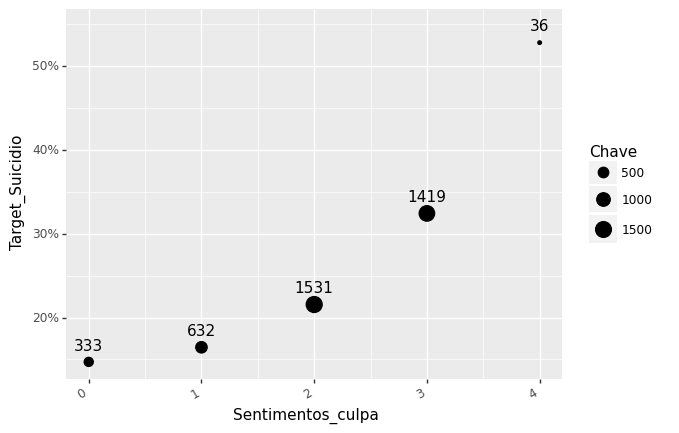

In [16]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Sentimentos_culpa').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Sentimentos_culpa', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Sentimentos_culpa', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.02) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

## Humor deprimido
0=Ausente; 1= Duvidoso ou trivial; 2=Leve-Sente-se triste, sem esperança, indefeso, inútil não mais do que 2 dias; 3=Moderado; 4=Grave:

In [17]:
df['Deprimido'].value_counts()

3.0    1826
2.0    1441
4.0     463
1.0     206
0.0      15
Name: Deprimido, dtype: int64

Suicidio médio: 24.3%
   Deprimido  Target_Suicidio  Chave
0        0.0         0.066667     15
1        1.0         0.165049    206
2        2.0         0.175573   1441
3        3.0         0.268346   1826
4        4.0         0.397408    463


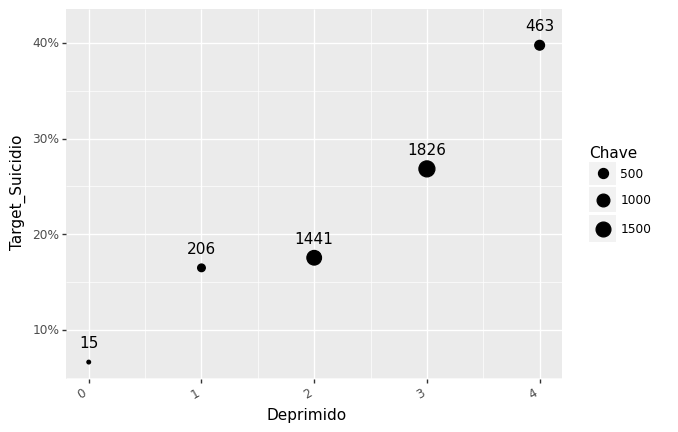

In [18]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Deprimido').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Deprimido', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Deprimido', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.02) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

### Escala Hamilton de classificação para depressão-clínico - Pontuação total 
Score com mais de 25 pontos caracterizam pacientes gravemente deprimidos, score entre 18 a 24 pontos caracterizam pacientes moderadamente deprimidos e escores entre 7 e 17 pontos caracterizam pacientes com depressão leve

Suicidio médio: 24.3%
    Pontuação total  Target_Suicidio  Chave
0              13.0         0.000000      4
1              14.0         0.105263    114
2              15.0         0.039683    126
3              16.0         0.078313    166
4              17.0         0.133333    195
5              18.0         0.109804    255
6              19.0         0.141221    262
7              20.0         0.153310    287
8              21.0         0.188612    281
9              22.0         0.220280    286
10             23.0         0.245955    309
11             24.0         0.221805    266
12             25.0         0.270992    262
13             26.0         0.345133    226
14             27.0         0.335260    173
15             28.0         0.394558    147
16             29.0         0.407143    140
17             30.0         0.427184    103
18             31.0         0.445545    101
19             32.0         0.440000     75
20             33.0         0.581818     55
21        

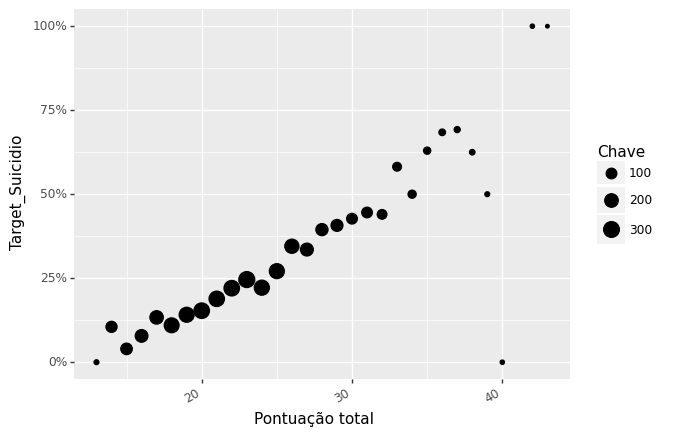

In [19]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Pontuação total').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Pontuação total', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Pontuação total', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    #pn.geom_text(pn.aes(label='Chave'), nudge_y=0.08) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

## Trabalho e interesses
0=Ausente: Sem dificuldade; 1=Duvidoso ou trivial: Pensamentos e sentimentos de incapacidade, fadiga ou fraqueza relacionados às atividades; trabalho ou hobbies; 2=Leve: Perda de interesse na atividade; hobbies ou trabalho — seja diretamente relatado pelo paciente, ou indireto em indiferença, indecisão e vacilação; 3=Moderado: Diminuição do tempo real gasto nas atividades ou diminuição da produtividade; 4=Grave:

Suicidio médio: 24.3%
   Trabalho e interesses  Target_Suicidio  Chave
0                    0.0         0.114943     87
1                    1.0         0.131868    364
2                    2.0         0.193467   1194
3                    3.0         0.280795   2062
4                    4.0         0.385246    244


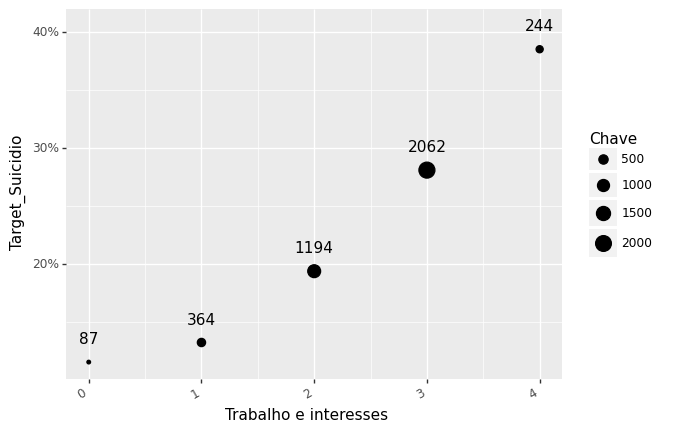

In [47]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Trabalho e interesses').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Trabalho e interesses', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Trabalho e interesses', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.02) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

Suicidio médio: 24.3%
   Ansiedade somática  Target_Suicidio  Chave
0                 0.0         0.197492    319
1                 1.0         0.204911   1181
2                 2.0         0.249084   1638
3                 3.0         0.300423    709
4                 4.0         0.346154    104


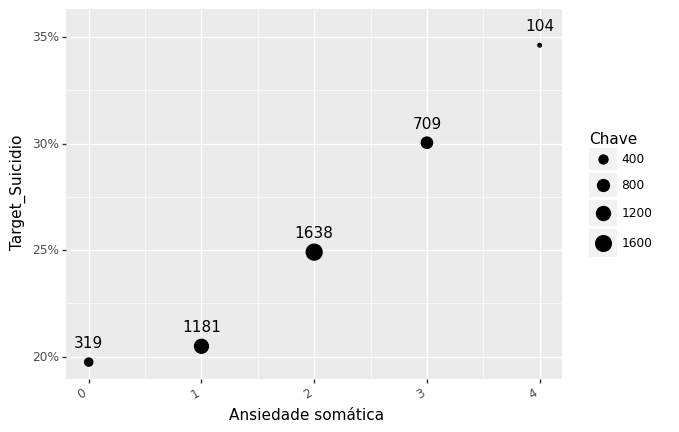

In [21]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Ansiedade somática').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Ansiedade somática', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Ansiedade somática', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.009) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

<AxesSubplot:xlabel='idade', ylabel='Suicidio'>

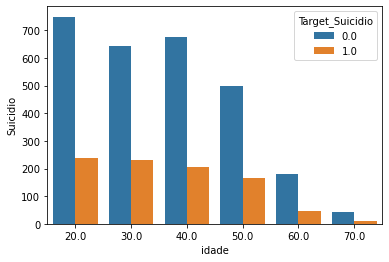

In [22]:
# Pensamento suicída não varia muito entre as faixas de idade de 20 à 40 anos
df_analalise=df[['Target_Suicidio', 'idade', 'Suicidio']].groupby(['Target_Suicidio','idade']).count().reset_index()
se.barplot(data=df_analalise,x='idade',y='Suicidio',hue='Target_Suicidio')

## Feminino = 1 Masculino = 2

<AxesSubplot:xlabel='sexo', ylabel='Suicidio'>

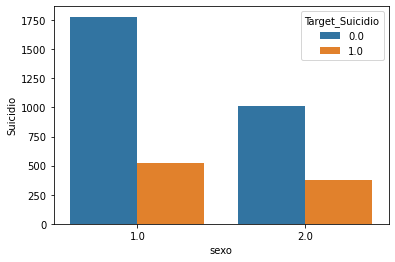

In [23]:
# Pensamentos suicídias são mais frequentes no sexo masculino
df_analalise=df[['Target_Suicidio','sexo', 'Suicidio']].groupby(['Target_Suicidio','sexo']).count().reset_index()
se.barplot(data=df_analalise,x='sexo',y='Suicidio',hue='Target_Suicidio')

Suicidio médio: 24.3%
   sexo  Target_Suicidio  Chave
0   1.0         0.226759   2302
1   2.0         0.269704   1383


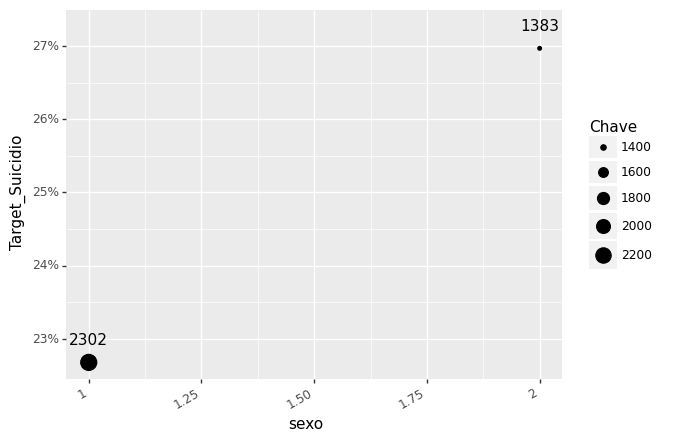

In [44]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('sexo').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['sexo', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='sexo', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.003) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

In [26]:
# Divisão dos dados por assunto
df_caracteristica = df[['Chave','Target_Suicidio','sexo', 'Estado_civil', 'Status_empl','Licenca','Tipo_Resid', 'Residencia', 'idade','Anos educacao formal','Estudante','Renda mensal', 'Recebe assistencia publica',
                        'Receber dinheiro do emprego', 'Trabalho e interesses', 'Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes']]
df_emoc= df[['Chave','Target_Suicidio','Alcoolatra', 'Droga', 'Insonia', 'Insonia media', 'Insonia tardia', 'Deprimido', 'Ansiedade','Perda de insights', 'Apetite', 'Perda de peso', 'Ansiedade somática', 'Hipocondriase', 'Sentimentos_culpa', 'Energia', 
             'Lentidao pensamento e fala', 'Pontuação total', 'Agitação', 'Libido','Suicidio', 'Eixo I: Panico com agorafobia', 'Eixo I: Panico sem agorafobia', 'Eixo I: Fobia especifica',
             'Eixo I: Fobia social', 'Eixo I: Obsessivo-compulsivo', 'Eixo I: Estresse pos-traumatico', 'Eixo I: Ansiedade generalizada', 'Eixo II: Personalidade paranoica', 'Eixo II: Transtorno de personalidade']]

df_fam = df[['Chave', 'Target_Suicidio','Impacto de sua familia e amigos', 'Numero de amigos vivendo com paciente', 'Suic_familia', 'Dep_familia','Bip_familia','Alc_familia','Drog_familia',
             'Numero de parentes vivendo com paciente', 'Conjuge_companheiro vive com paciente', 'Numero total de pessoas em casa']]  

df_fisc=df[['Chave', 'Target_Suicidio','coracao', 'vascular', 'hematopoetico', 'Olho_ore_nariz_garg_lar', 'GI_sup', 'Gi_inf', 'Renal', 'Genito_urinario', 'Musculoesqueletico', 'Neuro', 'psiquiatrica', 'Respiratorio', 'Figado', 'Endocrino_metabolico']]

<AxesSubplot:>

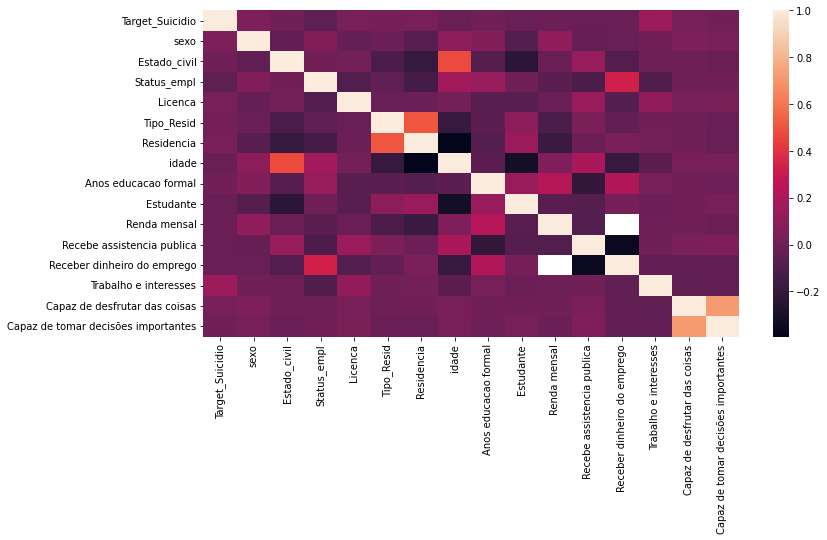

In [27]:
#Características
plt.figure(figsize=(12,6))
se.heatmap(df_caracteristica.corr())

<AxesSubplot:>

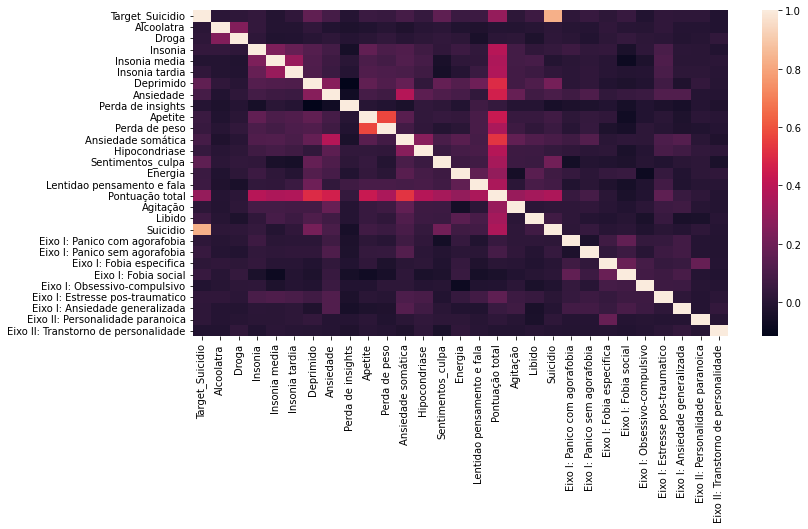

In [28]:
# Emocional
plt.figure(figsize=(12,6))
se.heatmap(df_emoc.corr())

<AxesSubplot:>

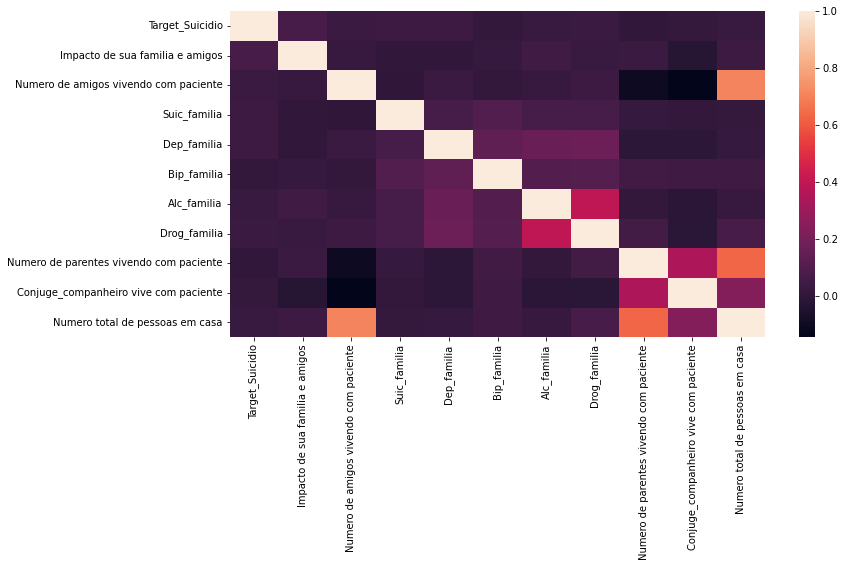

In [29]:
#Família
plt.figure(figsize=(12,6))
se.heatmap(df_fam.corr())

<AxesSubplot:>

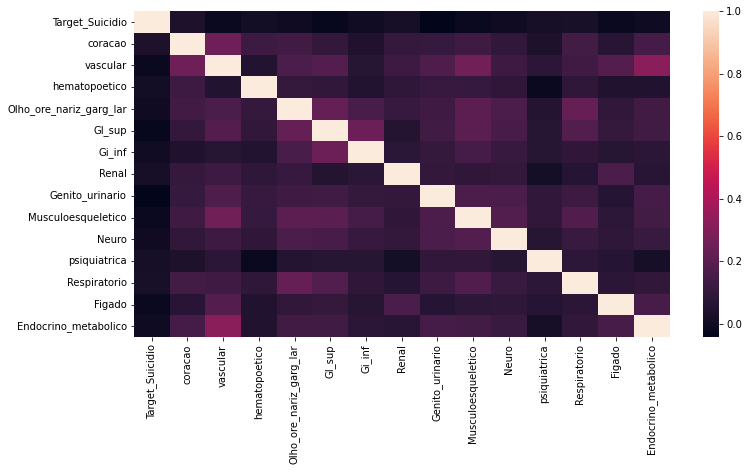

In [30]:
# Doenças físicas
plt.figure(figsize=(12,6))
se.heatmap(df_fisc.corr())

## Análise por Target Ansiedade

In [31]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Ansiedade' & Coluna2 != 'Target_Ansiedade'").head(20)

,Coluna1,Coluna2,correlation
85,Target_Ansiedade,Ansiedade,0.725695
98,Target_Ansiedade,Ansiedade somática,0.521631
104,Target_Ansiedade,Pontuação total,0.479023
161,Target_Ansiedade,Deprimido,0.276330
238,Target_Ansiedade,Hipocondriase,0.184208
284,Target_Ansiedade,Target_Hipocondriase,0.167432
337,Target_Ansiedade,Agitação,0.154151
347,Target_Ansiedade,Trabalho e interesses,0.151204
392,Target_Ansiedade,TOC,0.139066
485,Target_Ansiedade,Eixo I: Estresse pos-traumatico,0.123695


Ansiedade média: 42.2%
    Pontuação total  Target_Ansiedade  Chave
0              13.0          0.250000      4
1              14.0          0.070175    114
2              15.0          0.126984    126
3              16.0          0.114458    166
4              17.0          0.184615    195
5              18.0          0.145098    255
6              19.0          0.206107    262
7              20.0          0.310105    287
8              21.0          0.313167    281
9              22.0          0.332168    286
10             23.0          0.398058    309
11             24.0          0.500000    266
12             25.0          0.549618    262
13             26.0          0.557522    226
14             27.0          0.635838    173
15             28.0          0.612245    147
16             29.0          0.728571    140
17             30.0          0.757282    103
18             31.0          0.851485    101
19             32.0          0.920000     75
20             33.0          0.9

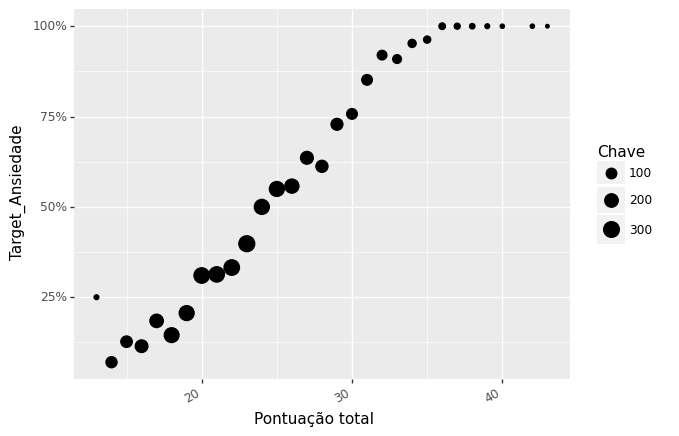

In [32]:
print('Ansiedade média: {:.1%}'.format(df['Target_Ansiedade'].mean()))
df_plot = df.groupby('Pontuação total').agg({'Target_Ansiedade': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Pontuação total', 'Target_Ansiedade', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Pontuação total', y='Target_Ansiedade')) +
    pn.geom_point(pn.aes(size='Chave')) +
    #pn.geom_text(pn.aes(label='Chave'), nudge_y=0.01) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

Ansiedade média: 42.2%
   Hipocondriase  Target_Ansiedade  Chave
0            0.0          0.357143   1610
1            1.0          0.376200   1042
2            2.0          0.473970    922
3            3.0          0.704787    376
4            4.0          0.000000      1


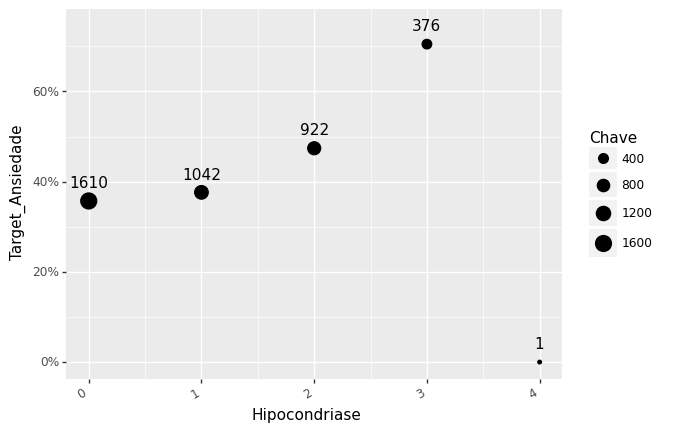

In [33]:
print('Ansiedade média: {:.1%}'.format(df['Target_Ansiedade'].mean()))
df_plot = df.groupby('Hipocondriase').agg({'Target_Ansiedade': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Hipocondriase', 'Target_Ansiedade', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Hipocondriase', y='Target_Ansiedade')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.04) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

## Análise Tárget TOC

In [34]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_TOC' & Coluna2 != 'Target_TOC'").head(20)

,Coluna1,Coluna2,correlation
80,Target_TOC,TOC,0.829427
219,Target_TOC,Pontuação total,0.200676
327,Target_TOC,Eixo I: Estresse pos-traumatico,0.155710
340,Target_TOC,Ansiedade somática,0.153367
345,Target_TOC,Hipocondriase,0.152083
423,Target_TOC,Target_Hipocondriase,0.135234
509,Target_TOC,Agitação,0.119529
543,Target_TOC,Insonia,0.115120
581,Target_TOC,Ansiedade,0.110249
590,Target_TOC,Target_Insonia,0.109282


## Análise Tárget Insônia

In [35]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Insonia' & Coluna2 != 'Target_Insonia'").head(20)

,Coluna1,Coluna2,correlation
75,Target_Insonia,Insonia,0.937812
120,Target_Insonia,Pontuação total,0.388652
186,Target_Insonia,Insonia media,0.243426
245,Target_Insonia,Insonia tardia,0.182770
286,Target_Insonia,Apetite,0.167349
372,Target_Insonia,Deprimido,0.142437
407,Target_Insonia,TOC,0.137576
528,Target_Insonia,Ansiedade somática,0.116781
535,Target_Insonia,Target_Ansiedade,0.116094
591,Target_Insonia,Target_TOC,0.109282


## Análise Tárget Hipocondriase

In [36]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Hipocondriase' & Coluna2 != 'Target_Hipocondriase'").head(20)

,Coluna1,Coluna2,correlation
76,Target_Hipocondriase,Hipocondriase,0.881362
142,Target_Hipocondriase,Pontuação total,0.339757
188,Target_Hipocondriase,Ansiedade somática,0.239876
254,Target_Hipocondriase,Musculoesqueletico,0.178408
264,Target_Hipocondriase,GI_sup,0.175112
285,Target_Hipocondriase,Target_Ansiedade,0.167432
329,Target_Hipocondriase,TOC,0.155695
405,Target_Hipocondriase,Ansiedade,0.137871
422,Target_Hipocondriase,Target_TOC,0.135234
441,Target_Hipocondriase,Endocrino_metabolico,0.133254


## Análise Tárget Drogas

In [37]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Drogas' & Coluna2 != 'Target_Drogas'").head(20)

,Coluna1,Coluna2,correlation
78,Target_Drogas,Alcoolatra,0.869710
93,Target_Drogas,Droga,0.607575
389,Target_Drogas,psiquiatrica,0.140324
694,Target_Drogas,sexo,0.097145
1056,Target_Drogas,Drog_familia,0.070187
1129,Target_Drogas,Respiratorio,0.067241
1238,Target_Drogas,Alc_familia,0.061676
1307,Target_Drogas,Tipo_Resid,0.057985
1366,Target_Drogas,Residencia,0.055272
1668,Target_Drogas,Numero de amigos vivendo com paciente,0.043897
